In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('육군신체측정정보.csv', encoding = 'cp949' )

C:\Users\skygg\anaconda3\envs\py38_test2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [4]:
df.tail()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
167975,167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167976,167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167977,167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167978,167982,20170131,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4
167979,167983,20170131,86.6,88.3,175.8,73.0 (28.7 in),77.8,56.3,26.1,51.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   순번          167980 non-null  int64  
 1   측정 일자       167980 non-null  int64  
 2   가슴 둘레 센티미터  167980 non-null  float64
 3   소매길이 센티미터   167980 non-null  float64
 4   신장 센티미터     167980 non-null  float64
 5   허리 둘레 센티미터  167980 non-null  object 
 6   샅높이 센티미터    167980 non-null  float64
 7   머리 둘레 센티미터  167980 non-null  float64
 8   발 길이 센티미터   167980 non-null  float64
 9   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.8+ MB


In [6]:
df.isnull().sum()

순번            0
측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    0
발 길이 센티미터     0
몸무게 킬로그램      0
dtype: int64

In [7]:
df.rename(columns = {'순번':'splt','측정 일자':'day','가슴 둘레 센티미터':'chest','소매길이 센티미터':'arm', '신장 센티미터':'height', '허리 둘레 센티미터':'waist', '샅높이 센티미터':'sat', '머리 둘레 센티미터':'head','발 길이 센티미터':'feet', '몸무게 킬로그램':'weight'}, inplace = True) 

In [8]:
df= df[['arm', 'height','weight']]

In [9]:
# 피처 스케일링
mean = df.mean(axis=0)
df -= mean
std =df.std(axis=0)
df /= std

In [10]:
print(df.head())

        arm    height    weight
0  1.933555  1.983913  0.076028
1 -1.281644 -1.374604 -0.513410
2  0.837465  0.956170  1.531430
3 -0.660526 -0.603797 -0.040404
4  0.289419  0.405594 -0.367870


In [11]:
y_train = df['weight'].values
print(y_train[0:5])

[ 0.07602772 -0.5134101   1.53142973 -0.04040444 -0.3678699 ]


In [12]:
x_train = []

for i, rows in df.iterrows():
    x_train.append([rows['arm'], rows['height']])
       
print(x_train[0:5])

[[1.9335554861189321, 1.983912665023129], [-1.2816443841502068, -1.3746035036607636], [0.8374646212544525, 0.9561700123111199], [-0.6605262273936674, -0.6037965141267528], [0.2894191888222128, 0.40559359121540006]]


In [13]:
from tensorflow import keras
import numpy as np

model = keras.Sequential([
    keras.layers.Dense(2),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid' )
])

In [14]:
model.compile(optimizer='adam', loss= "mse", metrics = ['mae'] )

In [15]:
model.fit(np.array(x_train), np.array(y_train), epochs = 20)

Epoch 1/20
5250/5250 [==============================] - 8s 1ms/step - loss: 0.9166 - mae: 0.7785
Epoch 2/20
5250/5250 [==============================] - 7s 1ms/step - loss: 0.9150 - mae: 0.7778
Epoch 3/20
5250/5250 [==============================] - 7s 1ms/step - loss: 0.9147 - mae: 0.7775
Epoch 4/20
5250/5250 [==============================] - 7s 1ms/step - loss: 0.9146 - mae: 0.7775
Epoch 5/20
5250/5250 [==============================] - 7s 1ms/step - loss: 0.9146 - mae: 0.7774
Epoch 6/20
5250/5250 [==============================] - 7s 1ms/step - loss: 0.9144 - mae: 0.7774
Epoch 7/20
5250/5250 [==============================] - 8s 1ms/step - loss: 0.9145 - mae: 0.7775
Epoch 8/20
5250/5250 [==============================] - 8s 2ms/step - loss: 0.9144 - mae: 0.7773
Epoch 9/20
5250/5250 [==============================] - 8s 2ms/step - loss: 0.9144 - mae: 0.7776
Epoch 10/20
5250/5250 [==============================] - 8s 2ms/step - loss: 0.9143 - mae: 0.7773
Epoch 11/20
5250/5250 [======

In [19]:
model.evaluate(np.array(x_train), np.array(y_train))

5250/5250 [==============================] - 5s 917us/step - loss: 0.9141 - mae: 0.7771


[0.9141038656234741, 0.7771177887916565]

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 256)               768       
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,823
Trainable params: 66,823
Non-trainable params: 0
_________________________________________________________________


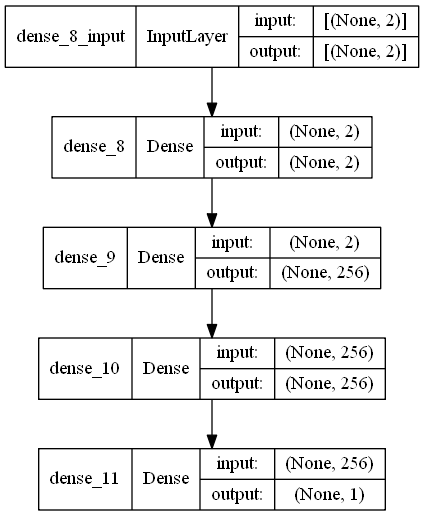

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)